In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# url = 'https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/'
file_path = 'data/amz_uk_price_prediction_dataset.csv'  
df = pd.read_csv(file_path)

# Generate a frequency table for the product category
category_counts = df['category'].value_counts()

# Generate a frequency table for the product category in percentage
category_counts_percentage = df['category'].value_counts(normalize=True) * 100

# Display the top 5 most listed product categories
top_5_categories = category_counts.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

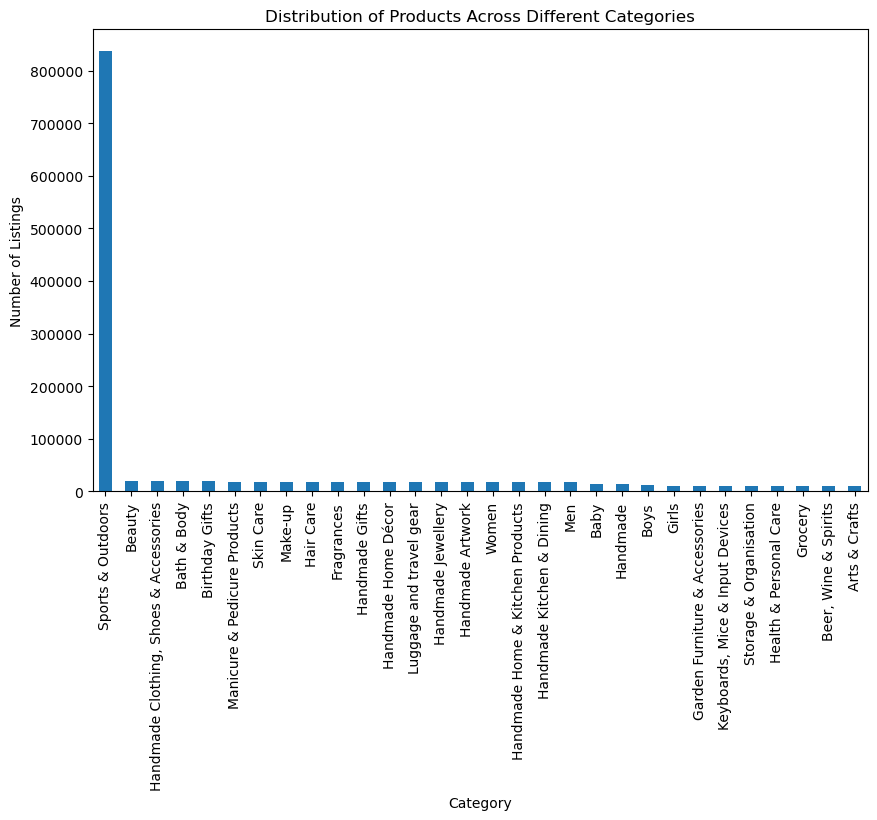

In [6]:
# Visualization: Bar chart for product categories
plt.figure(figsize=(10, 6))
category_counts.head(30).plot(kind='bar')
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.show()

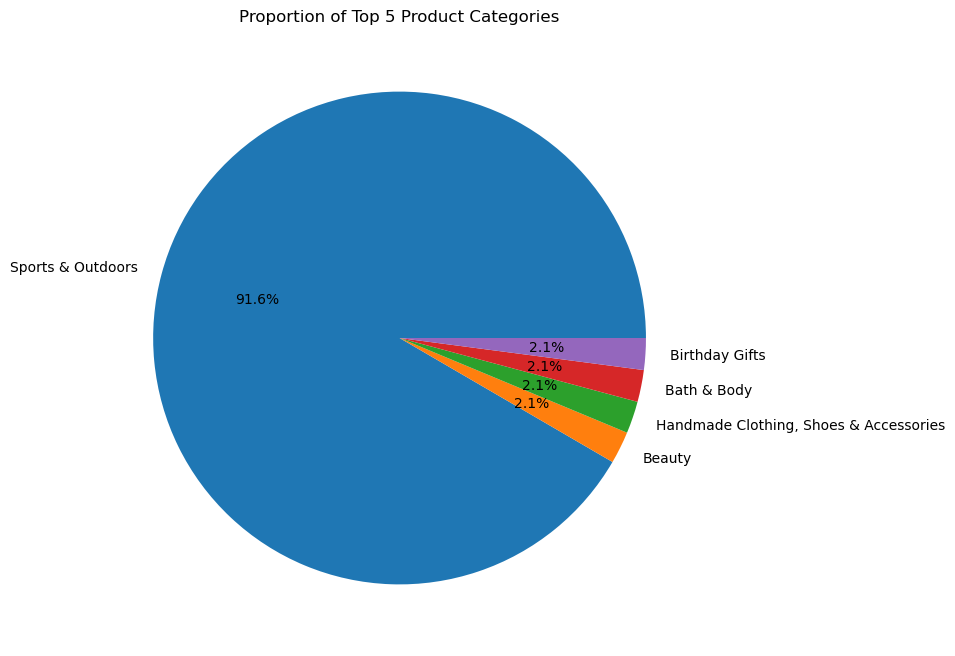

In [35]:
# Visualization: Pie chart for top 5 categories
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Top 5 Product Categories')
plt.ylabel('')
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [36]:
# 2.1- Calculate the mean, median, and mode for the `price` of products.
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()
# Show the results
mean_price, median_price, mode_price # 

# What's the average price point of products listed? 
# How does this compare with the most common price point (mode)? 
# Being mean_price = 89.24380943923663, median = 19.09 and mode = 9.99

# - The average price point of products listed is 89.24.
# - The most common price point is 9.99. 
# - The median price point is 19.09.

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [37]:
# Determine the variance, standard deviation, range, and interquartile range for product `price`.
price_variance = df['price'].var()
price_std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
# Show the results
price_variance, price_std_dev, price_range, price_iqr 
# That throws: 119445.48532256528, 345.60886175352226, 100000.0, 36.0

# Question 1: How varied are the product prices?
# Are there any indicators of a significant spread in prices?

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

##### 📊 Análisis de la Variabilidad del Precio

Has calculado la **varianza**, **desviación estándar**, **rango** e **intervalo intercuartil (IQR)** de la columna `price` en un DataFrame, y los resultados son:

###### 📌 Resultados:
- **Varianza**: `119445.49`
- **Desviación Estándar**: `345.61`
- **Rango**: `100000.0`
- **Intervalo Intercuartil (IQR)**: `36.0`

###### 📊 Interpretación:
- **Varianza y Desviación Estándar**: Indican un alto nivel de dispersión en los datos de precios, ya que los valores son bastante grandes.
- **Rango**: La diferencia entre el precio más alto y el más bajo es de `100000`, lo que sugiere la posible presencia de valores atípicos (**outliers**).
- **IQR**: El 50% central de los datos está dentro de un intervalo de solo `36` unidades, lo que significa que, a pesar del alto rango, la mayoría de los precios están concentrados en un rango más pequeño.

3. **Visualizations**:
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.

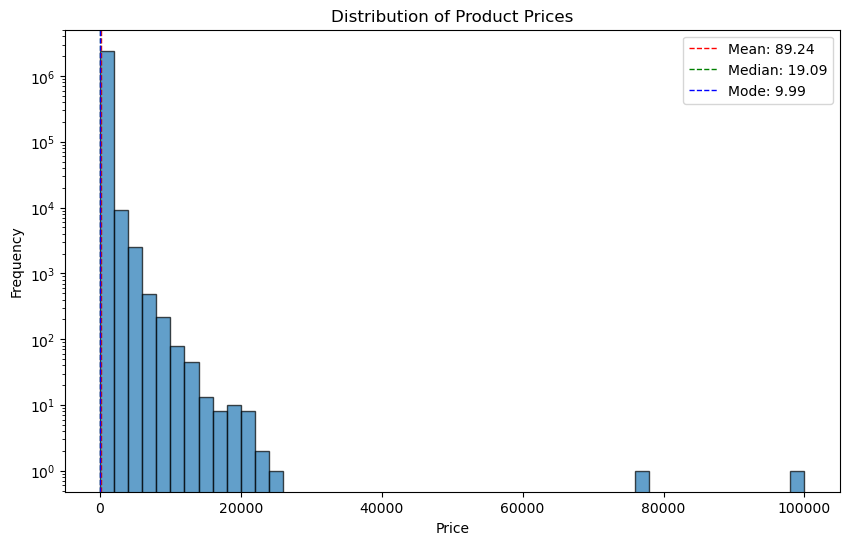

In [38]:
# Calculate mean, median, mode, and standard deviation
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
std_dev_price = df['price'].std()

# Plot a histogram to visualize the distribution of product prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='k', alpha=0.7)
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_price:.2f}')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization
plt.legend()
plt.show()

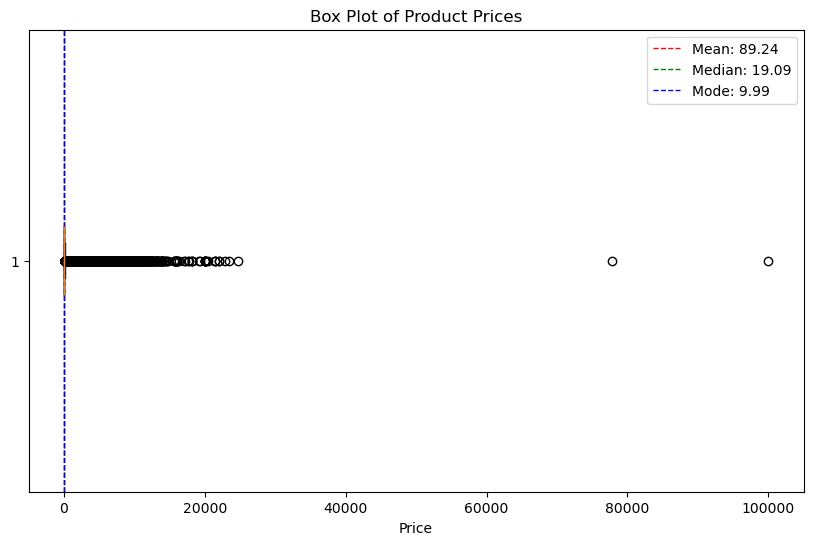

In [39]:
# Plot a box plot to showcase the spread and potential outliers in product pricing
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_price:.2f}')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.legend()
plt.show()

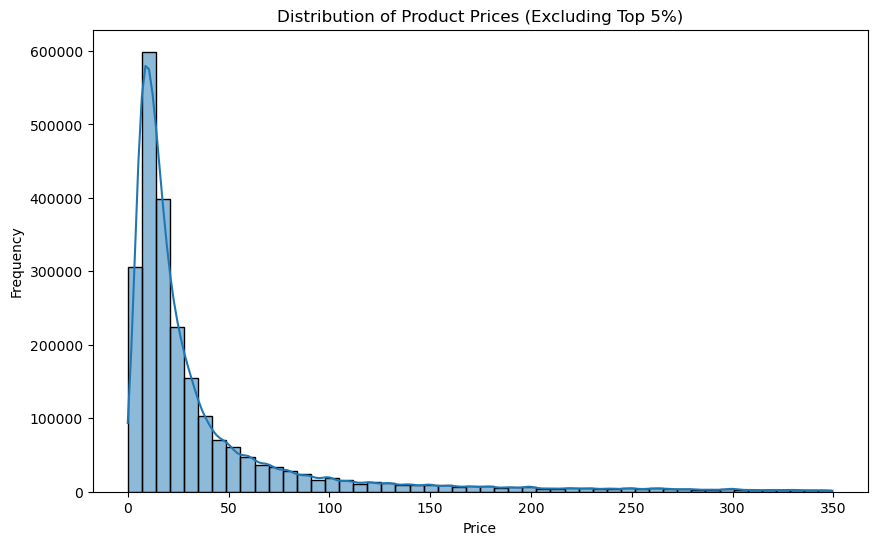

In [ ]:
# Existencia de atípicos, eliminamos outliers:

amazon95 = df['price'].quantile(0.95) # 349.5 is the 95th percentile of the product prices.

# Esto significa que el 95% de los productos cuestan menos de 349.5, mientras que el 5% más caro cuesta más.

# Filter out the top 5% of the product prices. 
# Se filtran los productos cuyo precio es mayor que amazon95 (349.5).
top_5_percent_prices = df[df['price'] > amazon95]
top_5_percent_prices.head() 

df_filtrado = df[df['price'] < amazon95] 

# histplot df_filtrado['price']
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices (Excluding Top 5%)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [40]:
# Show all numeric columns
# df.describe().T

In [41]:
# Calculate the mean, median, and mode for the `rating` of products:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()
# Show the results
print(f'media = {mean_rating}, median = {median_rating}, mode = {mode_rating}') 
# media = 2.152836472966065, median = 0.0, mode = 0

media = 2.152836472966065, median = 0.0, mode = 0    0.0
Name: stars, dtype: float64


### 📊 **Análisis de las Calificaciones de los Productos**
A partir de los cálculos obtenidos:

- **Media de Calificación** = `2.15`  
- **Mediana de Calificación** = `0.0`  
- **Moda de Calificación** = `0` (valor más frecuente)

#### 🔍 **Interpretación de la Tendencia en las Calificaciones**
1. **La moda es 0**, lo que sugiere que **muchos productos no tienen calificación o tienen una muy baja**.
2. **La mediana también es 0**, lo que indica que **al menos la mitad de los productos no han sido calificados**.
3. **La media es de 2.15**, lo que significa que, cuando los productos reciben una calificación, **suelen ser bajas en lugar de altas**.

#### 📉 **Conclusión**
Los clientes **no califican la mayoría de los productos** (moda = 0) o, cuando lo hacen, las calificaciones tienden a ser **bajas**.  
Esta distribución puede deberse a:
- **Problemas de calidad** en los productos (si las bajas calificaciones reflejan insatisfacción).
- **Falta de participación** de los clientes al no dejar reseñas.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [42]:
# Determine the variance, standard deviation, and interquartile range for product `rating`:
rating_variance = df['stars'].var()
rating_std_dev = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
# Show the results
print(f'variance = {rating_variance}, std_dev = {rating_std_dev}, iqr = {rating_iqr}')

variance = 4.81743402976196, std_dev = 2.1948653785054697, iqr = 4.4


### 📊 **Análisis de la Variabilidad en las Calificaciones**
A partir de los cálculos obtenidos:

- **Varianza** = `4.82`  
- **Desviación Estándar** = `2.19`  
- **Rango Intercuartil (IQR)** = `4.4`

#### 🔍 **¿Las calificaciones son consistentes o hay una gran variación?**
1. **La desviación estándar es de 2.19**, lo que indica que las calificaciones **varían considerablemente** respecto a la media.
2. **El IQR es de 4.4**, lo que sugiere que el 50% de las calificaciones se encuentran dentro de un rango bastante amplio, reflejando **una gran dispersión** en las opiniones de los clientes.
3. **La varianza es relativamente alta (4.82)**, reforzando la idea de que **las calificaciones no son consistentes** y hay una amplia diversidad de opiniones.

#### 📉 **Conclusión**
Las calificaciones de los productos **no son uniformes**, lo que indica que:
- **Algunos productos pueden ser muy bien valorados, mientras que otros reciben calificaciones muy bajas**.
- **Los clientes tienen experiencias muy diferentes**, lo que puede deberse a variaciones en la calidad del producto, expectativas del usuario o diferencias en la cantidad de reseñas.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [43]:
# Calculate the skewness and kurtosis for the `rating` column:
rating_skewness = df['stars'].skew()
rating_kurtosis = df['stars'].kurt()
# Show the results
print(f'skewness = {rating_skewness}, kurtosis = {rating_kurtosis}')

skewness = 0.08120735761080985, kurtosis = -1.9260061280432985


### 📊 **Análisis de la Distribución de las Calificaciones**
A partir de los cálculos obtenidos:

- **Asimetría (Skewness)** = `0.081`  
- **Curtosis (Kurtosis)** = `-1.926`  

#### 🔍 **¿Las calificaciones siguen una distribución normal?**
1. **Asimetría (Skewness ≈ 0)**  
   - Un valor cercano a `0` indica que la distribución es **casi simétrica**.
   - Como el valor es **ligeramente positivo (0.081)**, sugiere que hay **una leve inclinación hacia calificaciones más altas**, pero no es significativa.

2. **Curtosis (-1.926)**  
   - Un valor negativo indica que la distribución es **platicúrtica**, es decir, **más plana que una normal**.
   - Esto significa que hay **menos valores extremos** de los esperados en una distribución normal.

#### 📉 **Conclusión**
- **Las calificaciones están relativamente bien distribuidas, sin una inclinación fuerte hacia valores altos o bajos**.
- **La distribución es más plana de lo esperado**, lo que sugiere que los datos están más dispersos y no tienen muchos valores atípicos extremos.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

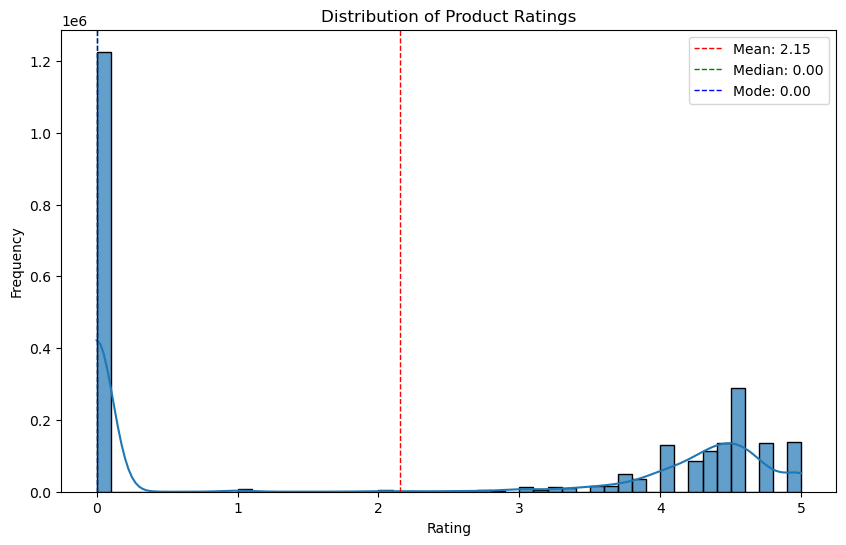

Mean: 2.15
Median: 0.00
Mode: 0.00
Standard Deviation: 2.19


In [44]:
# Calculate mean, median, mode, and standard deviation for ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]
std_dev_rating = df['stars'].std()

# Plot a histogram to visualize the distribution of product ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=50, kde=True, edgecolor='k', alpha=0.7)
plt.axvline(mean_rating, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_rating:.2f}')
plt.axvline(mode_rating, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_rating:.2f}')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the calculated values
print(f'Mean: {mean_rating:.2f}')
print(f'Median: {median_rating:.2f}')
print(f'Mode: {mode_rating:.2f}')
print(f'Standard Deviation: {std_dev_rating:.2f}')

### 📊 **Análisis de la Frecuencia de Calificaciones**
A partir de los cálculos obtenidos:

- **Media** = `2.15`
- **Mediana** = `0.00`
- **Moda** = `0.00`
- **Desviación Estándar** = `2.19`

#### 🔍 **¿Hay una calificación más común?**
1. **La moda es 0.00**, lo que indica que la calificación más frecuente es **0**.
2. **La mediana también es 0.00**, lo que sugiere que **al menos el 50% de los productos tienen una calificación de 0**.
3. **La media es 2.15**, lo que implica que, aunque la mayoría de los valores están en `0`, hay algunas calificaciones más altas que elevan el promedio.

#### 📉 **Conclusión**
- **Sí, hay una calificación predominante, y es 0.00**.
- La mayoría de los productos **no tienen calificación o han recibido la peor puntuación posible**.
- Esto podría indicar una **falta de interacción de los clientes** o una tendencia a no calificar productos.